In [2]:
import requests
import time
from bs4 import BeautifulSoup
import json
import pandas as pd
import csv
# 抓取网页的函数

def get_html(url):
    headers = {
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/68.0.3440.106 Safari/537.36',
    }# 爬虫模拟访问信息

    r = requests.get(url, timeout=30,headers=headers)
    r.raise_for_status()
    r.endcodding = 'utf-8'
    #print(r.text)
    return r.text


def get_content(url):
    '''
    分析网页文件，整理信息，保存在列表变量中
    '''
    comments = []
    # 首先，把需要爬取信息的网页下载到本地
    html = get_html(url)
    try:
        s=json.loads(html)
    except:
        print("jsonload error")
    
    num=len(s['data']['replies']) # 获取每页评论栏的数量
    # print(num)
    i=0
    while i<num:
        comment=s['data']['replies'][i]# 获取每栏评论

        InfoDict={} # 存储每组信息字典
        
        InfoDict['Uname']=comment['member']['uname'] # 用户名
        InfoDict['Lever']=comment['member']['level_info']['current_level']#用户等级
        InfoDict['Like']=comment['like'] #点赞数
        InfoDict['Rcount']=comment['rcount']#回复数
        InfoDict['Content']=comment['content']['message'].replace('\n',';')     
        '''评论内容,并将评论内容中的回车替换为；  防止写入CSV文件时自动换行导致顺序错乱'''
        InfoDict['Time']=time.strftime("%Y-%m-%d %H:%M:%S",time.localtime(comment['ctime'])) # ctime格式的特殊处理？不太清楚具体原理
        
        comments.append(InfoDict)
        i=i+1
    # print(comments)
    return comments


def Out2File(dict):
    '''
    将爬取到的文件写入到本地
    保存到当前目录的 李子柒.CSV文件中。
    '''
    
    with open('李子柒.csv', 'a+',encoding='utf-8') as f:
        
        i=0
        for comment in dict:
            
            try:
                
                #header = ["用户名","等级","点赞数","回复数","评论内容","评论时间"]
                f.write('{},{},{},{},{},{}\n\t'.format(comment['Uname'],comment['Lever'], comment['Like'],comment['Rcount'], comment['Content'], comment['Time']))
                i=i+1
            except:
                print("out2File error")
        print('当前页面保存完成')
        
        
        
if __name__ == '__main__':
    e=0
    page=1
    while e == 0 :
        url = url = "https://api.bilibili.com/x/v2/reply?&pn="+ str(page)+"&type=1&oid=373530017&sort=2" 
        try:
            print()
            
            # print(url)
            content=get_content(url)
            print("page:",page)
            Out2File(content)
            page=page+1
           
            if page == 20: #设置爬取总页数,爬取全部数据时删除即可
                break
            if page%10 == 0:
                time.sleep(5)# 为了降低被封ip的风险，每爬10页便歇5秒 。
               
        except:
            e=1


page: 1
当前页面保存完成

page: 2
当前页面保存完成

page: 3
当前页面保存完成

page: 4
当前页面保存完成

page: 5
当前页面保存完成

page: 6
当前页面保存完成

page: 7
当前页面保存完成

page: 8
当前页面保存完成

page: 9
当前页面保存完成

page: 10
当前页面保存完成

page: 11
当前页面保存完成

page: 12
当前页面保存完成

page: 13
当前页面保存完成

page: 14
当前页面保存完成

page: 15
当前页面保存完成

page: 16
当前页面保存完成

page: 17
当前页面保存完成

page: 18
当前页面保存完成

page: 19
当前页面保存完成


词云生成成功


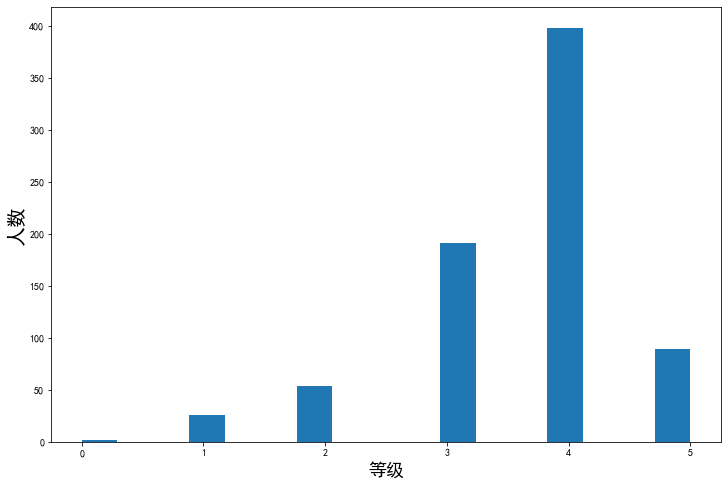

In [3]:
'''评论词云分析部分，实战时用于找出对方最突出的观点，方便后续有针对的对线'''
import jieba
import wordcloud
import pandas as pd
import re
filename = '李子柒.csv'
with open(filename,'a',encoding='utf-8') as f:
    f = pd.read_csv(filename, header=None, names=["用户名","等级","点赞数","回复数","评论内容","评论时间"])#读取csv，并添加列名

#print(f)
content=f['评论内容']
content.to_csv('content.csv',header=True, index=False)#生成新的评论csv进行观察

emoji=r"\[.*?\]"#部分表情的正则表达
content=re.sub(emoji,'',str(content))#去除评论中的表情，避免后续对高频词分析
# print(type(content))
# print(content)

#筛选出中文（后续油管实战可以改为筛选英文或韩文）
pattern = re.compile(u'[\u4e00-\u9fa5]+')
content=re.findall(pattern,content)

all_content = ''
list_txt = []
for i in content:
    all_content += str(i)
for c in jieba.cut(all_content):
    if len(c) >= 2:
        list_txt.append(c)
# print(all_content)       
# print(list_txt)
cut_text = " ".join(list_txt)
w = wordcloud.WordCloud(width=1500,
                        height=1200,
                        background_color='white',
                        font_path='msyh.ttc')

# 给词云输入文字
w.generate(cut_text)

# 将词云图片导出到当前文件夹
w.to_file('词云1.png')
print('词云生成成功')



#####################################################################
'''等级分布分析'''

import matplotlib.pyplot as plt


data = f['等级']
star = []
for level in data:
    if level == '6':
        star.append(5)
    elif level == '5':
        star.append(4)
    elif level == '4':
        star.append(3)
    elif level == '3':
        star.append(2)
    elif level == '2':
        star.append(1)#极大可能为水军
    else:
        star.append(0)#基本为零，如果有，水军嫌疑最大
#print(star)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(12, 8))
plt.hist(star, bins=17)
plt.xlabel('等级', size=18)
plt.ylabel('人数', size=20)
plt.savefig('等级分布.jpg')